In [1]:
import pyodbc
import pandas as pd
from pycaret.classification import setup, compare_models

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
import pyodbc
import pandas as pd

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost;"        # default instance
    "DATABASE=LOAN_PORTFOLIO_DB;"
    "Trusted_Connection=yes"   # use Windows Authentication
)

In [3]:
customer_df = pd.read_sql("SELECT * FROM CUSTOMER_DETAILS", conn)
account_df = pd.read_sql("SELECT * FROM ACCOUNT_DETAILS", conn)
transaction_df = pd.read_sql("SELECT * FROM TRANSACTION_DETAILS", conn)
loan_cashflow_df = pd.read_sql("SELECT * FROM LOAN_CASHFLOW", conn)
repayment_df = pd.read_sql("SELECT * FROM REPAYMENT", conn)

In [4]:
account_df

,MASKED_ID,ACC_MASKED_ID,TERM,TERM_AMOUNT,OOD,ACTIVE_PRODUCT,ORIG_CONTRACT_DATE,ACCT_CLOSE_DATE,ACCT_STATUS,MONTHEND_CONVERTED_BALANCE,CONVERTED_BALANCE,JUN_25,JUL_25,AUG_25,SEP_25,OCT_25,NOV_25
0,000454,BB00106DV0L7,None,NaN,NaN,SAVINGS ACCOUNT,2022-11-24,None,ACTIVE,4.207961e+05,1.761807e+04,5.816745e+04,7.188120e+04,1.290630e+03,1.952680e+03,1.506377e+04,2.226882e+05
1,000454,BB00106F1DX0,60M,500000.0,NaN,FIXED DEPOSIT ACCOUNT,2022-11-24,None,ACTIVE,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05
2,000454,BB00106L3ZVN,1097D,400000.0,NaN,LOAN ACCOUNT,2022-11-24,2025-12-03,CLOSE,NaN,NaN,-6.444448e+04,-5.304663e+04,-4.322869e+04,-3.287300e+04,-2.233317e+04,-1.130280e+04
3,000454,BB00133NSWRT,369D,2375000.0,NaN,LOAN ACCOUNT,2022-12-21,2023-11-10,CLOSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000454,BB00138PNPFT,60M,2500000.0,NaN,FIXED DEPOSIT ACCOUNT,2022-12-16,None,ACTIVE,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9998721,BB09079RPQ53,None,NaN,NaN,SAVINGS ACCOUNT,2014-06-30,None,ACTIVE,3.654700e+02,9.254700e+02,2.586855e+04,2.701799e+04,3.078505e+04,4.528308e+04,2.068335e+04,8.629330e+03
8516,9999535,BB02118R8W32,None,NaN,NaN,SAVINGS ACCOUNT,2024-11-25,None,ACTIVE,8.833616e+04,8.211600e+02,1.016601e+05,1.156048e+06,5.234788e+04,6.728861e+04,1.164431e+05,1.327792e+05
8517,9999535,BB09079FWV46,None,NaN,NaN,SAVINGS ACCOUNT,2014-07-18,None,ACTIVE,7.789401e+05,2.758661e+05,1.404001e+04,6.464130e+03,1.243665e+05,7.613335e+04,2.626008e+05,8.083205e+05
8518,9999658,BB09079VJS24,None,NaN,NaN,SAVINGS ACCOUNT,2014-04-30,None,ACTIVE,5.454049e+04,4.559549e+04,5.743928e+04,6.547739e+04,7.128710e+04,7.698738e+04,7.129555e+04,4.570675e+04


In [5]:
customer_df
customer_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,MARITAL_STATUS,DATE_OF_BIRTH,EMPLOYMENT_STATUS,MASKED_LEGAL_ID,LEGAL_DOC_NAME,INDUSTRY_CODE,INDUSTRY
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,MARRIED,1989-02-12,UNEMPLOYED,673211788H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,SINGLE,1998-04-19,EMPLOYED,764988120H,NIC,9848688888,"TRADE-GARMENTS, CULTURAL AND RECREATION GOODS"
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,None,1984-03-22,EMPLOYED,623608269H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,None,2000-03-23,EMPLOYED,088836189142,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,MARRIED,1964-09-07,UNEMPLOYED,425399959W,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,SINGLE,1986-06-08,EMPLOYED,644488129H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
2505,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,SINGLE,1991-04-21,BUSINESS,799900186H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
2506,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,MARRIED,1980-06-22,SELF-EMPLOYED,976895289567,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...
2507,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,MARRIED,1996-04-30,SELF-EMPLOYED,744098515H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...


# Rule 1 - Hard Eligibility & Regulatory Rules

## Regulatory Age Check

In [6]:
customer_df['Eligibility_Flag'] = 'ELIGIBLE'
customer_df['Rejection_Reason'] = None

In [7]:
customer_df.loc[
    (customer_df['AGE'] < 18) | (customer_df['AGE'] > 80),
    ['Eligibility_Flag', 'Rejection_Reason']
] = ['REJECT', 'Regulatory Age Restriction']


In [8]:
customer_df[customer_df['Eligibility_Flag'] == 'REJECT'][['AGE', 'Eligibility_Flag', 'Rejection_Reason']]


,AGE,Eligibility_Flag,Rejection_Reason
1342,88,REJECT,Regulatory Age Restriction
1394,90,REJECT,Regulatory Age Restriction
1912,90,REJECT,Regulatory Age Restriction
2015,99,REJECT,Regulatory Age Restriction
2124,81,REJECT,Regulatory Age Restriction
2160,82,REJECT,Regulatory Age Restriction
2369,82,REJECT,Regulatory Age Restriction


In [9]:
customer_df['Eligibility_Flag'].value_counts()


ELIGIBLE    2502
REJECT         7
Name: Eligibility_Flag, dtype: int64

In [10]:
eligible_cus_df = customer_df[customer_df['Eligibility_Flag'] == 'ELIGIBLE'].copy()


## Account Eligibility Check

In [11]:
active_accounts = account_df[
    (account_df['ACCT_STATUS'] == 'ACTIVE') |
    (account_df['ACCT_CLOSE_DATE'].isna())
]

active_account_count = (
    active_accounts
    .groupby('MASKED_ID')
    .size()
    .reset_index(name='Number_of_Active_Accounts')
)

In [12]:
eligible_cus_df = eligible_cus_df.merge(
    active_account_count,
    on='MASKED_ID',
    how='left'
)

In [13]:

# if no accounts isnted of Nan use 0 
eligible_cus_df['Number_of_Active_Accounts'] = (
    eligible_cus_df['Number_of_Active_Accounts']
    .fillna(0)
    .astype(int)
)


In [14]:
# Step 1: Set ELSE condition (default)
eligible_cus_df['Eligibility_Flag'] = 'ELIGIBLE'
eligible_cus_df['Rejection_Reason'] = 'Existing Customer'

# Step 2: Apply IF condition
eligible_cus_df.loc[
    eligible_cus_df['Number_of_Active_Accounts'] == 0,
    ['Eligibility_Flag', 'Rejection_Reason']
] = ['REJECT', 'Non-Existing Customer']

In [15]:
eligible_cus_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,MARITAL_STATUS,DATE_OF_BIRTH,EMPLOYMENT_STATUS,MASKED_LEGAL_ID,LEGAL_DOC_NAME,INDUSTRY_CODE,INDUSTRY,Eligibility_Flag,Rejection_Reason,Number_of_Active_Accounts
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,MARRIED,1989-02-12,UNEMPLOYED,673211788H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,5
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,SINGLE,1998-04-19,EMPLOYED,764988120H,NIC,9848688888,"TRADE-GARMENTS, CULTURAL AND RECREATION GOODS",ELIGIBLE,Existing Customer,2
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,None,1984-03-22,EMPLOYED,623608269H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,1
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,None,2000-03-23,EMPLOYED,088836189142,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,MARRIED,1964-09-07,UNEMPLOYED,425399959W,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,SINGLE,1986-06-08,EMPLOYED,644488129H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,SINGLE,1991-04-21,BUSINESS,799900186H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,MARRIED,1980-06-22,SELF-EMPLOYED,976895289567,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,2
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,MARRIED,1996-04-30,SELF-EMPLOYED,744098515H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1


In [16]:
eligible_cus_df['Number_of_Active_Accounts'].describe()

count    2502.000000
mean        2.107514
std         2.602868
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        46.000000
Name: Number_of_Active_Accounts, dtype: float64

In [17]:
eligible_cus_df['Number_of_Active_Accounts'].value_counts().sort_index()

0        9
1     1524
2      462
3      195
4       94
5       54
6       47
7       18
8       29
9        9
10      12
11      10
12      12
13       7
14       1
15       5
16       4
17       1
19       3
20       1
25       1
27       1
28       1
35       1
46       1
Name: Number_of_Active_Accounts, dtype: int64

In [18]:
eligible_cus_df['Eligibility_Flag'].unique()

array(['ELIGIBLE', 'REJECT'], dtype=object)

## Employment Status Validation

In [19]:
valid_employment_status = pd.read_sql(
    "SELECT DISTINCT EMPLOYMENT_STATUS FROM CUSTOMER_DETAILS",
    conn
)['EMPLOYMENT_STATUS'].dropna().tolist()

In [20]:
eligible_cus_df['Employment_Status_Flag'] = 'Valid Employment Status'

eligible_cus_df.loc[
    ~eligible_cus_df['EMPLOYMENT_STATUS'].isin(valid_employment_status),
    'Employment_Status_Flag'
] = 'Invalid Employment Status'

In [21]:
eligible_cus_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,DATE_OF_BIRTH,EMPLOYMENT_STATUS,MASKED_LEGAL_ID,LEGAL_DOC_NAME,INDUSTRY_CODE,INDUSTRY,Eligibility_Flag,Rejection_Reason,Number_of_Active_Accounts,Employment_Status_Flag
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,1989-02-12,UNEMPLOYED,673211788H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,5,Valid Employment Status
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,1998-04-19,EMPLOYED,764988120H,NIC,9848688888,"TRADE-GARMENTS, CULTURAL AND RECREATION GOODS",ELIGIBLE,Existing Customer,2,Valid Employment Status
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,1984-03-22,EMPLOYED,623608269H,NIC,9908088888,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,1,Valid Employment Status
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,2000-03-23,EMPLOYED,088836189142,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3,Valid Employment Status
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,1964-09-07,UNEMPLOYED,425399959W,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,1986-06-08,EMPLOYED,644488129H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,1991-04-21,BUSINESS,799900186H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3,Valid Employment Status
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,1980-06-22,SELF-EMPLOYED,976895289567,EIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,2,Valid Employment Status
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,1996-04-30,SELF-EMPLOYED,744098515H,NIC,9918688888,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status


In [22]:
# Check age range
print(eligible_cus_df['AGE'].min(), eligible_cus_df['AGE'].max())

# Check active accounts
print(eligible_cus_df['Number_of_Active_Accounts'].min())

# Check employment status
print(eligible_cus_df['EMPLOYMENT_STATUS'].unique())

# Check eligibility flag
print(eligible_cus_df['Eligibility_Flag'].unique())

19 80
0
['UNEMPLOYED' 'EMPLOYED' 'SELF-EMPLOYED' 'BUSINESS' 'STUDENT' 'RETIRED'
 'FREELANCE' None]
['ELIGIBLE' 'REJECT']


# Rule 2 - Employment-Based Routing & Participation Rules

## Routing & Participation 

In [23]:
eligible_cus_df['Employment_Segment'] = 'Other'

In [24]:
eligible_cus_df.loc[
    (eligible_cus_df['EMPLOYMENT_STATUS'].isin(['EMPLOYED', 'SELF-EMPLOYED', 'BUSINESS'])) &
    (eligible_cus_df['AGE'].between(18, 60)),
    'Employment_Segment'
] = 'Core Working Group'


In [25]:
eligible_cus_df.loc[
    (eligible_cus_df['EMPLOYMENT_STATUS'].isin(['UNEMPLOYED	', 'RETIRED', 'STUDENT', 'FREELANCE'])) &
    (eligible_cus_df['AGE'].between(18, 65)),
    'Employment_Segment'
] = 'Special Segment'

In [26]:
eligible_cus_df.loc[
    (eligible_cus_df['EMPLOYMENT_STATUS'].isin([
        'UNEMPLOYED', 'RETIRED', 'STUDENT', 'FREELANCE', 
        'EMPLOYED', 'SELF-EMPLOYED', 'BUSINESS'
    ])) &
    (~eligible_cus_df['AGE'].between(18, 60)),  # not between 18 and 60
    'Employment_Segment'
] = 'Not valid segment'

# Rule 3 - Age-Based Segments

In [27]:
eligible_cus_df['Age_Bucket'] = pd.cut(
    eligible_cus_df['AGE'],
    bins=[17, 25, 40, 60, 80],
    labels=['Young Adult', 'Adult', 'Middle-Aged', 'Senior']
)

In [28]:
eligible_cus_df['Age_Bucket'].value_counts(dropna=False)

Adult          1085
Middle-Aged     822
Young Adult     395
Senior          200
Name: Age_Bucket, dtype: int64

# Rule 4 - Financial capacity

In [29]:
balance_cols = ['JUN_25', 'JUL_25', 'AUG_25', 'SEP_25', 'OCT_25', 'NOV_25']

In [30]:
account_df['Monthly_Avg_Balance'] = account_df[balance_cols].mean(axis=1)

In [31]:
account_df

,MASKED_ID,ACC_MASKED_ID,TERM,TERM_AMOUNT,OOD,ACTIVE_PRODUCT,ORIG_CONTRACT_DATE,ACCT_CLOSE_DATE,ACCT_STATUS,MONTHEND_CONVERTED_BALANCE,CONVERTED_BALANCE,JUN_25,JUL_25,AUG_25,SEP_25,OCT_25,NOV_25,Monthly_Avg_Balance
0,000454,BB00106DV0L7,None,NaN,NaN,SAVINGS ACCOUNT,2022-11-24,None,ACTIVE,4.207961e+05,1.761807e+04,5.816745e+04,7.188120e+04,1.290630e+03,1.952680e+03,1.506377e+04,2.226882e+05,6.184066e+04
1,000454,BB00106F1DX0,60M,500000.0,NaN,FIXED DEPOSIT ACCOUNT,2022-11-24,None,ACTIVE,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05
2,000454,BB00106L3ZVN,1097D,400000.0,NaN,LOAN ACCOUNT,2022-11-24,2025-12-03,CLOSE,NaN,NaN,-6.444448e+04,-5.304663e+04,-4.322869e+04,-3.287300e+04,-2.233317e+04,-1.130280e+04,-3.787146e+04
3,000454,BB00133NSWRT,369D,2375000.0,NaN,LOAN ACCOUNT,2022-12-21,2023-11-10,CLOSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000454,BB00138PNPFT,60M,2500000.0,NaN,FIXED DEPOSIT ACCOUNT,2022-12-16,None,ACTIVE,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9998721,BB09079RPQ53,None,NaN,NaN,SAVINGS ACCOUNT,2014-06-30,None,ACTIVE,3.654700e+02,9.254700e+02,2.586855e+04,2.701799e+04,3.078505e+04,4.528308e+04,2.068335e+04,8.629330e+03,2.637789e+04
8516,9999535,BB02118R8W32,None,NaN,NaN,SAVINGS ACCOUNT,2024-11-25,None,ACTIVE,8.833616e+04,8.211600e+02,1.016601e+05,1.156048e+06,5.234788e+04,6.728861e+04,1.164431e+05,1.327792e+05,2.710945e+05
8517,9999535,BB09079FWV46,None,NaN,NaN,SAVINGS ACCOUNT,2014-07-18,None,ACTIVE,7.789401e+05,2.758661e+05,1.404001e+04,6.464130e+03,1.243665e+05,7.613335e+04,2.626008e+05,8.083205e+05,2.153209e+05
8518,9999658,BB09079VJS24,None,NaN,NaN,SAVINGS ACCOUNT,2014-04-30,None,ACTIVE,5.454049e+04,4.559549e+04,5.743928e+04,6.547739e+04,7.128710e+04,7.698738e+04,7.129555e+04,4.570675e+04,6.469891e+04


In [32]:
customer_balance_df = (
    account_df
    .groupby('MASKED_ID', as_index=False)['Monthly_Avg_Balance']
    .mean()
)


In [33]:
eligible_cus_df = eligible_cus_df.merge(
    customer_balance_df,
    on='MASKED_ID',
    how='left'
)


In [34]:
eligible_cus_df['Financial_Capacity'] = 'Unknown / Missing Balance Data'

eligible_cus_df.loc[
    eligible_cus_df['Monthly_Avg_Balance'] >= 100000,
    'Financial_Capacity'
] = 'High Financial Capacity'

eligible_cus_df.loc[
    eligible_cus_df['Monthly_Avg_Balance'].between(50000, 99999),
    'Financial_Capacity'
] = 'Medium Financial Capacity'

eligible_cus_df.loc[
    eligible_cus_df['Monthly_Avg_Balance'] < 50000,
    'Financial_Capacity'
] = 'Low Financial Capacity'


In [35]:
eligible_cus_df[['Monthly_Avg_Balance', 'Financial_Capacity']].sample(10)

,Monthly_Avg_Balance,Financial_Capacity
335,6.717467e+02,Low Financial Capacity
911,2.907216e+05,High Financial Capacity
1712,2.187610e+03,Low Financial Capacity
70,1.577620e+02,Low Financial Capacity
2383,6.339800e+02,Low Financial Capacity
1864,5.294167e+01,Low Financial Capacity
584,1.792032e+03,Low Financial Capacity
2043,1.429597e+03,Low Financial Capacity
396,2.169578e+04,Low Financial Capacity
2487,-1.323565e+06,Low Financial Capacity


# Rule 6 - Salary Verification Check

In [36]:
transaction_df

,MASK_TRAN_REF,ACC_MASKED_ID,MASKED_ID,AMOUNT_LCY,TRANSACTION_CODE,TRAN_NARRATIVE,BOOKING_DATE
0,9.825868e+13,BB02901VMKYW,014678,118500.0,774,CRM Cash Deposit,2025-08-15
1,9.814575e+13,BB02901VMKYW,014678,75000.0,774,CRM Cash Deposit,2025-08-04
2,9.832860e+13,BB02901VMKYW,014678,3000.0,774,CRM Cash Deposit,2025-08-22
3,9.815965e+13,BB02901VMKYW,014678,78000.0,774,CRM Cash Deposit,2025-08-05
4,9.823331e+13,BB02901VMKYW,014678,110000.0,774,CRM Cash Deposit,2025-08-13
...,...,...,...,...,...,...,...
363331,9.847196e+13,BB09079UEI07,9145405,-50.0,9004,POS Transaction,2025-09-06
363332,9.852475e+13,BB09079UEI07,9145405,-25000.0,8005,Outward CEFT Transfer,2025-09-11
363333,9.844866e+13,BB09079UEI07,9145405,-5.0,797,ATM Withdrawal Fee,2025-09-03
363334,9.844182e+13,BB09079UEI07,9145405,-5.0,797,ATM Withdrawal Fee,2025-09-03


In [37]:
transaction_df['AMOUNT_LCY'].dtype

dtype('float64')

In [38]:
transaction_df['AMOUNT_LCY'] = pd.to_numeric(
    transaction_df['AMOUNT_LCY'],
    errors='coerce'
)

In [39]:
transaction_df['AMOUNT_LCY'].dtype

dtype('float64')

In [40]:
credit_df = transaction_df[
    transaction_df['AMOUNT_LCY'] > 0
].copy()


In [41]:
credit_df[['AMOUNT_LCY']].head()

,AMOUNT_LCY
0,118500.0
1,75000.0
2,3000.0
3,78000.0
4,110000.0


In [42]:
credit_df['Month'] = pd.to_datetime(
    credit_df['BOOKING_DATE']
).dt.to_period('M')

In [43]:
credit_df

,MASK_TRAN_REF,ACC_MASKED_ID,MASKED_ID,AMOUNT_LCY,TRANSACTION_CODE,TRAN_NARRATIVE,BOOKING_DATE,Month
0,9.825868e+13,BB02901VMKYW,014678,118500.000000,774,CRM Cash Deposit,2025-08-15,2025-08
1,9.814575e+13,BB02901VMKYW,014678,75000.000000,774,CRM Cash Deposit,2025-08-04,2025-08
2,9.832860e+13,BB02901VMKYW,014678,3000.000000,774,CRM Cash Deposit,2025-08-22,2025-08
3,9.815965e+13,BB02901VMKYW,014678,78000.000000,774,CRM Cash Deposit,2025-08-05,2025-08
4,9.823331e+13,BB02901VMKYW,014678,110000.000000,774,CRM Cash Deposit,2025-08-13,2025-08
...,...,...,...,...,...,...,...,...
363302,9.867462e+13,BB09079JLP28,9852304,175000.000000,52,Cash Deposit,2025-09-26,2025-09
363316,9.845197e+13,BB09079ISP79,9124075,16648.000000,1002,Transfer Credit-MobileBanking,2025-09-04,2025-09
363317,9.856685e+13,BB09079ISP79,9124075,10000.000000,1002,Transfer Credit-MobileBanking,2025-09-15,2025-09
363319,9.851717e+13,BB01067MGFJ4,196013,36037.929688,258,Credit Transfer,2025-09-10,2025-09


In [44]:
monthly_credit = (
    credit_df
    .groupby(['MASKED_ID', 'Month'], as_index=False)['AMOUNT_LCY']
    .sum()
)

In [45]:
monthly_credit

,MASKED_ID,Month,AMOUNT_LCY
0,000454,2025-05,1.643678e+06
1,000454,2025-06,1.584125e+04
2,000454,2025-07,1.234416e+06
3,000454,2025-08,1.000131e+04
4,000454,2025-09,1.223049e+06
...,...,...,...
8091,9999658,2025-07,3.200000e+04
8092,9999658,2025-08,1.500000e+04
8093,9999658,2025-09,2.500000e+04
8094,9999658,2025-11,5.650000e+04


In [46]:
avg_monthly_income = (
    monthly_credit
    .groupby('MASKED_ID', as_index=False)['AMOUNT_LCY']
    .mean()
    .rename(columns={'AMOUNT_LCY': 'Avg_Monthly_Credit'})
)

In [47]:
eligible_cus_df['MASKED_ID'] = eligible_cus_df['MASKED_ID'].astype(str)


In [48]:
avg_monthly_income['MASKED_ID'] = avg_monthly_income['MASKED_ID'].astype(str)

In [49]:
eligible_cus_df['MASKED_ID'].dtype

dtype('O')

In [50]:
avg_monthly_income['MASKED_ID'].dtype

dtype('O')

In [51]:
eligible_cus_df = eligible_cus_df.merge(
    avg_monthly_income,
    on='MASKED_ID',
    how='left'
)


In [52]:
mask = (
    eligible_cus_df['Avg_Monthly_Credit'].isna() &
    (eligible_cus_df['Monthly_Avg_Balance'] > 0)
)

eligible_cus_df.loc[mask, 'Avg_Monthly_Credit'] = (
    eligible_cus_df.loc[mask, 'Monthly_Avg_Balance']
)

In [53]:
eligible_cus_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,INDUSTRY,Eligibility_Flag,Rejection_Reason,Number_of_Active_Accounts,Employment_Status_Flag,Employment_Segment,Age_Bucket,Monthly_Avg_Balance,Financial_Capacity,Avg_Monthly_Credit
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,5,Valid Employment Status,Other,Adult,294090.520248,High Financial Capacity,594627.180067
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,"TRADE-GARMENTS, CULTURAL AND RECREATION GOODS",ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Adult,1288.532501,Low Financial Capacity,1288.532501
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,HEALTH & SOCIAL-OTHER SOCIAL SERVICES,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Middle-Aged,NaN,Unknown / Missing Balance Data,NaN
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Young Adult,-328632.803597,Low Financial Capacity,406128.730574
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Not valid segment,Senior,2755.104980,Low Financial Capacity,2755.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,5273.733337,Low Financial Capacity,84100.000000
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Adult,26121.969971,Low Financial Capacity,418690.281250
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Middle-Aged,243207.672119,High Financial Capacity,626505.000000
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,CONSUMPTION-ANY OTHER CONSUMPTION RELATED LOAN...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,64698.908854,Medium Financial Capacity,32400.000000


In [54]:

eligible_cus_df['Cluster_Name'] = 'Unknown / Missing Salary'

eligible_cus_df.loc[
    eligible_cus_df['Avg_Monthly_Credit'] >= 100000,
    'Cluster_Name'
] = 'High Salary'

eligible_cus_df.loc[
    eligible_cus_df['Avg_Monthly_Credit'].between(50000, 99999),
    'Cluster_Name'
] = 'Medium Salary'

eligible_cus_df.loc[
    eligible_cus_df['Avg_Monthly_Credit'] < 50000,
    'Cluster_Name'
] = 'Low Salary'


In [55]:
eligible_cus_df

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,Eligibility_Flag,Rejection_Reason,Number_of_Active_Accounts,Employment_Status_Flag,Employment_Segment,Age_Bucket,Monthly_Avg_Balance,Financial_Capacity,Avg_Monthly_Credit,Cluster_Name
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,ELIGIBLE,Existing Customer,5,Valid Employment Status,Other,Adult,294090.520248,High Financial Capacity,594627.180067,High Salary
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Adult,1288.532501,Low Financial Capacity,1288.532501,Low Salary
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Middle-Aged,NaN,Unknown / Missing Balance Data,NaN,Unknown / Missing Salary
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Young Adult,-328632.803597,Low Financial Capacity,406128.730574,High Salary
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Not valid segment,Senior,2755.104980,Low Financial Capacity,2755.104980,Low Salary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,5273.733337,Low Financial Capacity,84100.000000,Medium Salary
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,ELIGIBLE,Existing Customer,3,Valid Employment Status,Core Working Group,Adult,26121.969971,Low Financial Capacity,418690.281250,High Salary
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,ELIGIBLE,Existing Customer,2,Valid Employment Status,Core Working Group,Middle-Aged,243207.672119,High Financial Capacity,626505.000000,High Salary
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,ELIGIBLE,Existing Customer,1,Valid Employment Status,Core Working Group,Adult,64698.908854,Medium Financial Capacity,32400.000000,Low Salary


In [56]:
import pandas as pd

# Export to Excel
# pip install openpyxl
eligible_cus_df.to_excel("eligible_customers.xlsx", index=False, sheet_name="Eligible_Customers")

print("Data successfully exported to Excel!")


Data successfully exported to Excel!


In [57]:
#Creating Credit scores

In [58]:

# Ensure AMOUNT_LCY is numeric

transaction_df["AMOUNT_LCY"] = pd.to_numeric(transaction_df["AMOUNT_LCY"], errors='coerce').fillna(0)


# Create inflow, outflow, net, and absolute activity

transaction_df["INFLOW"] = transaction_df["AMOUNT_LCY"].apply(lambda x: x if x > 0 else 0)
transaction_df["OUTFLOW"] = transaction_df["AMOUNT_LCY"].apply(lambda x: abs(x) if x < 0 else 0)
transaction_df["NET_AMOUNT"] = transaction_df["AMOUNT_LCY"]  # keeps signs
transaction_df["ABS_ACTIVITY"] = transaction_df["AMOUNT_LCY"].abs()


#  Aggregate per customer

txn_features = transaction_df.groupby("MASKED_ID").agg({
    "INFLOW": "sum",
    "OUTFLOW": "sum",
    "NET_AMOUNT": "sum",
    "ABS_ACTIVITY": "sum",
    "AMOUNT_LCY": ["mean", "std", "count"]  # original avg/std/count
}).reset_index()


# Flatten MultiIndex columns from aggregation

txn_features.columns = [
    "MASKED_ID",
    "TOTAL_INFLOW",
    "TOTAL_OUTFLOW",
    "NET_TRANSACTION_SUM",
    "ABS_ACTIVITY",
    "AVG_TRANSACTION",
    "STD_TRANSACTION",
    "TXN_COUNT"
]


# Fill missing values with 0

num_cols = txn_features.select_dtypes(include=["float64", "int64"]).columns
txn_features[num_cols] = txn_features[num_cols].fillna(0)

# Check result

print(txn_features.head())


  MASKED_ID  TOTAL_INFLOW  TOTAL_OUTFLOW  NET_TRANSACTION_SUM  ABS_ACTIVITY  \
0    000454  4.162390e+06   5.696551e+06        -1.534160e+06  9.858941e+06   
1    001538  3.249030e+06   6.594798e+06        -3.345768e+06  9.843828e+06   
2    001993  1.104928e+06   1.247065e+06        -1.421364e+05  2.351993e+06   
3    003399  1.115000e+06   2.343421e+06        -1.228421e+06  3.458421e+06   
4    003996  1.238358e+05   2.600734e+05        -1.362376e+05  3.839092e+05   

   AVG_TRANSACTION  STD_TRANSACTION  TXN_COUNT  
0    -12372.260785    247530.602318        124  
1     -9116.534110    104930.224168        367  
2      -728.904578     25902.062239        195  
3     -6862.689169     38158.564729        179  
4      -765.379550      3540.331580        178  


In [59]:
# Ensure numeric columns
loan_cashflow_df["CAPITAL_TO_BE_PAIED"] = pd.to_numeric(
    loan_cashflow_df["CAPITAL_TO_BE_PAIED"].astype(str).str.replace(",", "").str.replace(" ", ""),
    errors='coerce'
).fillna(0)

loan_cashflow_df["INTEREST_TO_BE_PAIED"] = pd.to_numeric(
    loan_cashflow_df["INTEREST_TO_BE_PAIED"].astype(str).str.replace(",", "").str.replace(" ", ""),
    errors='coerce'
).fillna(0)

loan_cashflow_df["TERM_AMOUNT"] = pd.to_numeric(
    loan_cashflow_df["TERM_AMOUNT"].astype(str).str.replace(",", "").str.replace(" ", ""),
    errors='coerce'
).fillna(0)

# Payment ratio per installment
loan_cashflow_df["PAYMENT_RATIO"] = loan_cashflow_df["CAPITAL_TO_BE_PAIED"] / loan_cashflow_df["TERM_AMOUNT"]

# Aggregate per customer
cash_features = loan_cashflow_df.groupby("MASKED_ID").agg({
    "CAPITAL_TO_BE_PAIED": "sum",
    "INTEREST_TO_BE_PAIED": "sum",
    "PAYMENT_RATIO": "mean"
}).reset_index()

# Rename columns
cash_features.columns = [
    "MASKED_ID",
    "TOTAL_CAPITAL_DUE",
    "TOTAL_INTEREST_DUE",
    "AVG_PAYMENT_RATIO"
]

# Fill missing values
cash_features = cash_features.fillna(0)


In [60]:
# Aggregate per customer
cash_features = loan_cashflow_df.groupby("MASKED_ID").agg({
    "CAPITAL_TO_BE_PAIED": "sum",
    "INTEREST_TO_BE_PAIED": "sum",
    "PAYMENT_RATIO": "mean"
}).reset_index()

# Rename columns
cash_features.columns = [
    "MASKED_ID",
    "TOTAL_CAPITAL_DUE",
    "TOTAL_INTEREST_DUE",
    "AVG_PAYMENT_RATIO"
]

# Fill NaN for customers with no loans
cash_features.fillna(0, inplace=True)


In [61]:
# Ensure numeric columns
account_df["MONTHEND_CONVERTED_BALANCE"] = pd.to_numeric(account_df["MONTHEND_CONVERTED_BALANCE"], errors='coerce').fillna(0)
account_df["CONVERTED_BALANCE"] = pd.to_numeric(account_df["CONVERTED_BALANCE"], errors='coerce').fillna(0)
account_df["OOD"] = pd.to_numeric(account_df["OOD"], errors='coerce').fillna(0)

# Calculate Utilization: ratio of loan balance / term amount
# (if TERM_AMOUNT available, else skip or adjust)
account_df["UTILIZATION"] = account_df["CONVERTED_BALANCE"] / account_df["TERM_AMOUNT"].replace(0, 1)

# Aggregate per customer if multiple accounts
acc_features = account_df.groupby("MASKED_ID").agg({
    "MONTHEND_CONVERTED_BALANCE": "mean",
    "UTILIZATION": "mean",
    "OOD": "max"
}).reset_index()

# Fill missing numeric values
acc_features = acc_features.fillna(0)


In [62]:
model_data = eligible_cus_df.copy()

In [63]:
model_data = model_data.merge(txn_features, on="MASKED_ID", how="left")

In [64]:
model_data = model_data.merge(cash_features, on="MASKED_ID", how="left")

In [65]:
model_data = model_data.merge(acc_features, on="MASKED_ID", how="left")

In [66]:
num_cols = model_data.select_dtypes(include=["float64", "int64"]).columns
model_data[num_cols] = model_data[num_cols].fillna(0)

In [67]:
# Identify categorical columns
cat_cols = model_data.select_dtypes(include=["category", "object"]).columns

for col in cat_cols:
    if pd.api.types.is_categorical_dtype(model_data[col]):
        # Add 'Unknown' to categories if not already present
        if "Unknown" not in model_data[col].cat.categories:
            model_data[col] = model_data[col].cat.add_categories("Unknown")
    # Fill missing values
    model_data[col] = model_data[col].fillna("Unknown")


In [68]:
print(model_data.head())
print(model_data.info())
print(model_data.isna().sum())

  MASKED_ID NAME_MASKED_ID  AGE  GENDER  CUSTOMER_RISK CUSTOMER_RISK_NAME  \
0    000454   CUSTOMER_356   36  FEMALE            1.0                LOW   
1    000866   CUSTOMER_410   27  FEMALE            1.0                LOW   
2    001135   CUSTOMER_455   41  FEMALE            1.0                LOW   
3    001538   CUSTOMER_899   25  FEMALE            1.0                LOW   
4    001906  CUSTOMER_2307   61  FEMALE            1.0                LOW   

                        OCCUPATION      DISTRICT  TARGET_CODE TARGET_DESC  \
0   Entrepreneur / Business Owners  ANURADHAPURA          948   Signature   
1  Garment & Related Trade Workers  ANURADHAPURA          908     Premier   
2    Private Sector Non-Executives    HAMBANTOTA          988   Essential   
3            Finance Professionals         GALLE          988   Essential   
4   Entrepreneur / Business Owners       COLOMBO          948   Signature   

   ...  ABS_ACTIVITY AVG_TRANSACTION STD_TRANSACTION TXN_COUNT  \
0  ...  

In [69]:
# Creating the default flag

In [70]:

# Extract one account status per customer

acct_status_df = account_df.groupby("MASKED_ID")["ACCT_STATUS"].first().reset_index()


#  Merge into model_data

model_data = model_data.merge(acct_status_df, on="MASKED_ID", how="left")


# Fill missing values with 'Unknown'

model_data["ACCT_STATUS"] = model_data["ACCT_STATUS"].fillna("Unknown")


print(model_data[["MASKED_ID", "ACCT_STATUS"]].head())



  MASKED_ID ACCT_STATUS
0    000454      ACTIVE
1    000866      ACTIVE
2    001135     DORMANT
3    001538      ACTIVE
4    001906       CLOSE


In [71]:
import numpy as np

model_data["DEFAULT"] = np.where(
    (model_data["OOD"] > 30) | (model_data["ACCT_STATUS"].isin(["Close","Delinquent"])),
    1, 0
)

# Check balance of default vs non-default
print(model_data["DEFAULT"].value_counts())


0    2451
1      51
Name: DEFAULT, dtype: int64


In [72]:
model_data

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,STD_TRANSACTION,TXN_COUNT,TOTAL_CAPITAL_DUE,TOTAL_INTEREST_DUE,AVG_PAYMENT_RATIO,MONTHEND_CONVERTED_BALANCE,UTILIZATION,OOD,ACCT_STATUS,DEFAULT
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,247530.602318,124.0,1071845.16,135138.47,-0.007552,265556.892955,0.111111,0.0,ACTIVE,0
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,0.000000,0.0,0.00,0.00,0.000000,1253.765015,0.000000,0.0,ACTIVE,0
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.0,DORMANT,0
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,104930.224168,367.0,-1354369.77,20821.79,0.000335,-173550.662476,-0.166667,0.0,ACTIVE,0
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,0.000000,0.0,0.00,0.00,0.000000,1386.209961,0.000000,0.0,CLOSE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,51061.950731,61.0,0.00,0.00,0.000000,1288.880005,0.000000,0.0,ACTIVE,0
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,42016.635203,413.0,0.00,0.00,0.000000,43944.810313,0.000000,0.0,ACTIVE,0
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,339409.893494,257.0,0.00,0.00,0.000000,433638.140625,0.000000,0.0,ACTIVE,0
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,11109.369180,83.0,0.00,0.00,0.000000,54540.488281,0.000000,0.0,ACTIVE,0


In [73]:
#Select features for credit scoring
features = [
    "TOTAL_INFLOW","TOTAL_OUTFLOW","NET_TRANSACTION_SUM","ABS_ACTIVITY",
    "AVG_TRANSACTION","STD_TRANSACTION","TXN_COUNT",
    "TOTAL_CAPITAL_DUE","TOTAL_INTEREST_DUE","AVG_PAYMENT_RATIO",
    "UTILIZATION","MONTHEND_CONVERTED_BALANCE","OOD",
    "AGE"
]

In [74]:
X = model_data[features]
y = model_data["DEFAULT"]

In [75]:
#Train Logistic Regression & predict PD

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
model = LogisticRegression(class_weight="balanced")  # helps with imbalanced data
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [79]:
model_data["PD"] = model.predict_proba(scaler.transform(X))[:,1]

In [80]:
min_score = 250  # Sri CRIB min
max_score = 900  #  Sri CRIB max

model_data["CREDIT_SCORE"] = (1 - model_data["PD"]) * (max_score - min_score) + min_score
model_data["CREDIT_SCORE"] = model_data["CREDIT_SCORE"].round(0)


In [81]:

print(model_data[["MASKED_ID","DEFAULT","PD","CREDIT_SCORE"]].head())

  MASKED_ID  DEFAULT        PD  CREDIT_SCORE
0    000454        0  0.099240         835.0
1    000866        0  0.095382         838.0
2    001135        0  0.099100         836.0
3    001538        0  0.105644         831.0
4    001906        0  0.104565         832.0


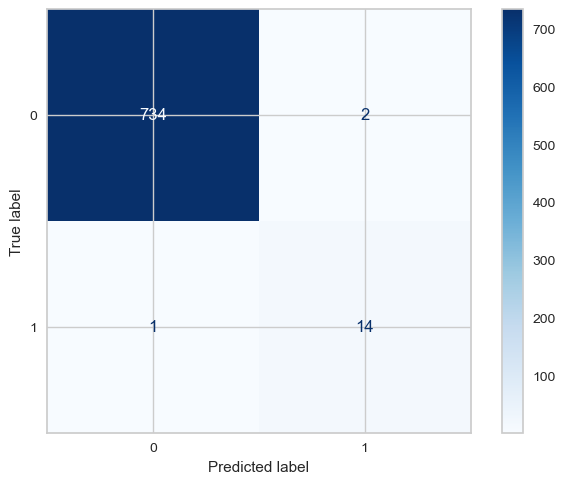

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap="Blues")


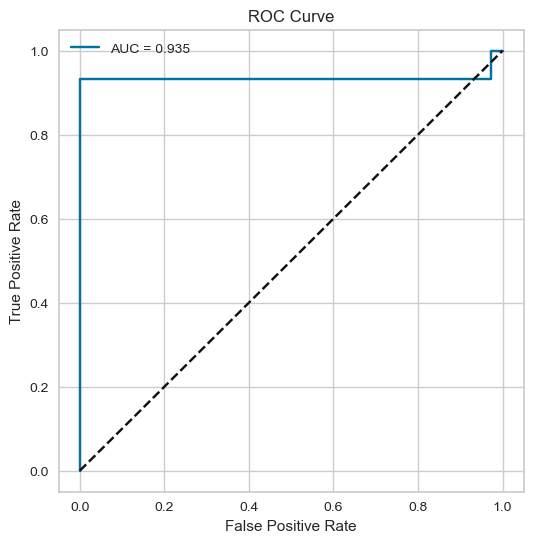

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


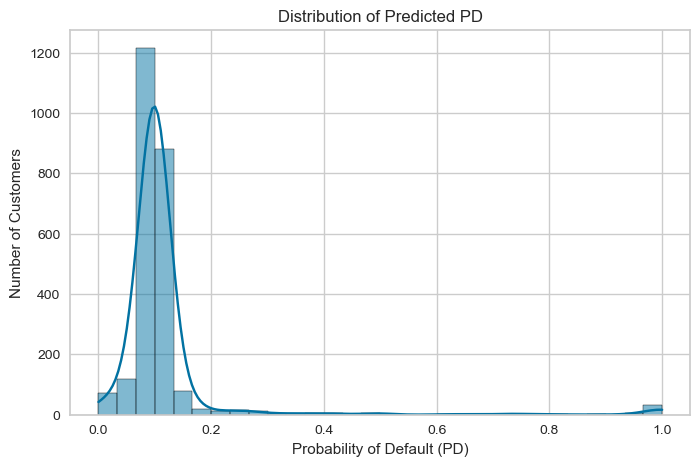

In [84]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(model_data["PD"], bins=30, kde=True)
plt.title("Distribution of Predicted PD")
plt.xlabel("Probability of Default (PD)")
plt.ylabel("Number of Customers")
plt.show()


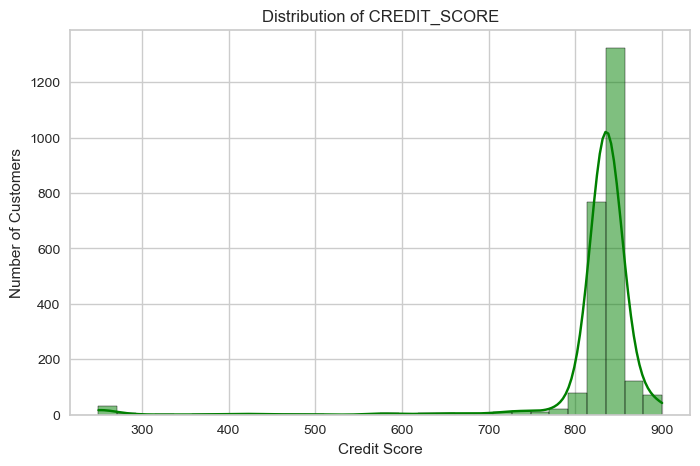

In [85]:
plt.figure(figsize=(8,5))
sns.histplot(model_data["CREDIT_SCORE"], bins=30, kde=True, color="green")
plt.title("Distribution of CREDIT_SCORE")
plt.xlabel("Credit Score")
plt.ylabel("Number of Customers")
plt.show()


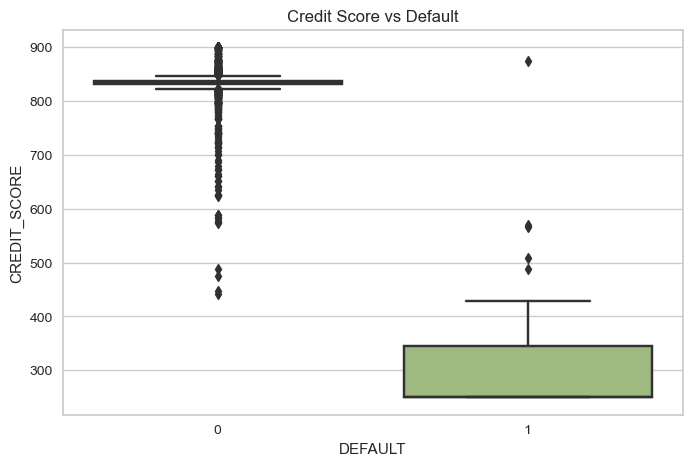

In [86]:
plt.figure(figsize=(8,5))
sns.boxplot(x="DEFAULT", y="CREDIT_SCORE", data=model_data)
plt.title("Credit Score vs Default")
plt.show()


In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.996005326231691
Precision: 0.875
Recall: 0.9333333333333333
F1 Score: 0.9032258064516129
ROC-AUC: 0.9351449275362318


In [88]:
model_data

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,TOTAL_CAPITAL_DUE,TOTAL_INTEREST_DUE,AVG_PAYMENT_RATIO,MONTHEND_CONVERTED_BALANCE,UTILIZATION,OOD,ACCT_STATUS,DEFAULT,PD,CREDIT_SCORE
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,1071845.16,135138.47,-0.007552,265556.892955,0.111111,0.0,ACTIVE,0,0.099240,835.0
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,0.00,0.00,0.000000,1253.765015,0.000000,0.0,ACTIVE,0,0.095382,838.0
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,0.00,0.00,0.000000,0.000000,0.000000,0.0,DORMANT,0,0.099100,836.0
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,-1354369.77,20821.79,0.000335,-173550.662476,-0.166667,0.0,ACTIVE,0,0.105644,831.0
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,0.00,0.00,0.000000,1386.209961,0.000000,0.0,CLOSE,0,0.104565,832.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,0.00,0.00,0.000000,1288.880005,0.000000,0.0,ACTIVE,0,0.101679,834.0
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,0.00,0.00,0.000000,43944.810313,0.000000,0.0,ACTIVE,0,0.106414,831.0
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,0.00,0.00,0.000000,433638.140625,0.000000,0.0,ACTIVE,0,0.083639,846.0
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,0.00,0.00,0.000000,54540.488281,0.000000,0.0,ACTIVE,0,0.098738,836.0


# Start - Defining clusters

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = [
    'AGE',
    'Monthly_Avg_Balance',
    'Avg_Monthly_Credit',
    'Number_of_Active_Accounts'
]

X = eligible_cus_df[features]

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Model 1 -  K-Means

In [90]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=4, random_state=42)
# labels_km = kmeans.fit_predict(X)


In [91]:
eligible_cus_df[features].isna().sum()

AGE                           0
Monthly_Avg_Balance          41
Avg_Monthly_Credit           51
Number_of_Active_Accounts     0
dtype: int64

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [93]:
features = [
    'AGE',
    'Monthly_Avg_Balance',
    'Avg_Monthly_Credit',
    'Number_of_Active_Accounts'
]

X = eligible_cus_df[features]

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42))
])


# Imputation step
# → fills missing values (median)

# Scaling step
# → standardizes features (required for distance-based clustering)

# KMeans clustering
# → the actual clustering algorithm

In [94]:
from sklearn.metrics import silhouette_score

best_score = -1  # initialize BEFORE the loop
best_k = None

for k in range(2, 8):
    pipe.set_params(kmeans__n_clusters=k)
    labels = pipe.fit_predict(X)

    X_transformed = pipe[:-1].transform(X)
    score = silhouette_score(X_transformed, labels)

    print(f'k={k}, silhouette score={score:.3f}')

    # Keep track of the best score
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nOptimal number of clusters: {best_k} with silhouette score: {best_score:.3f}")

k=2, silhouette score=0.686
k=3, silhouette score=0.417
k=4, silhouette score=0.425
k=5, silhouette score=0.435
k=6, silhouette score=0.370
k=7, silhouette score=0.378

Optimal number of clusters: 2 with silhouette score: 0.686


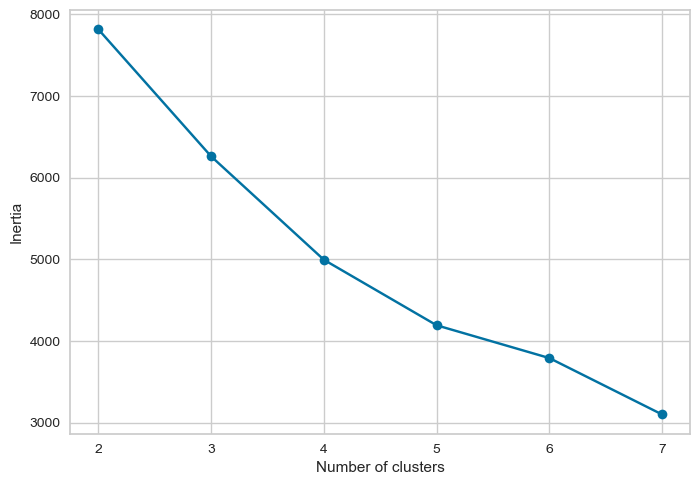

In [95]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 8)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# Model 2 - GMM

In [96]:
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

gmm_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('gmm', GaussianMixture(random_state=42))
])


In [97]:
bic_scores = []
aic_scores = []

for k in range(2, 8):
    gmm_pipe.set_params(gmm__n_components=k)
    gmm_pipe.fit(X)

    gmm = gmm_pipe.named_steps['gmm']
    bic_scores.append(gmm.bic(gmm_pipe[:-1].transform(X)))
    aic_scores.append(gmm.aic(gmm_pipe[:-1].transform(X)))

    print(f'k={k}, BIC={bic_scores[-1]:.0f}, AIC={aic_scores[-1]:.0f}')
    
    
# Lower BIC = better

# BIC penalizes too many clusters

# Usually smoother and safer than AIC

k=2, BIC=1031, AIC=863
k=3, BIC=-4663, AIC=-4919
k=4, BIC=-16847, AIC=-17191
k=5, BIC=-17226, AIC=-17657
k=6, BIC=-17454, AIC=-17973
k=7, BIC=-17485, AIC=-18091


In [98]:
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    gmm_pipe.set_params(gmm__n_components=k)
    labels = gmm_pipe.fit_predict(X)

    X_transformed = gmm_pipe[:-1].transform(X)
    score = silhouette_score(X_transformed, labels)

    print(f'k={k}, silhouette={score:.3f}')

k=2, silhouette=0.199
k=3, silhouette=0.004
k=4, silhouette=0.009
k=5, silhouette=0.009
k=6, silhouette=0.009
k=7, silhouette=0.009


# Model 3 - Hierarchical Clustering

In [99]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Preprocess (same logic, no leakage)
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)


In [100]:
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    agg = AgglomerativeClustering(
        n_clusters=k,
        linkage='ward'  # best for numeric risk data
    )
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)

    print(f'k={k}, silhouette={score:.3f}')


k=2, silhouette=0.693
k=3, silhouette=0.393
k=4, silhouette=0.404
k=5, silhouette=0.410
k=6, silhouette=0.413
k=7, silhouette=0.333


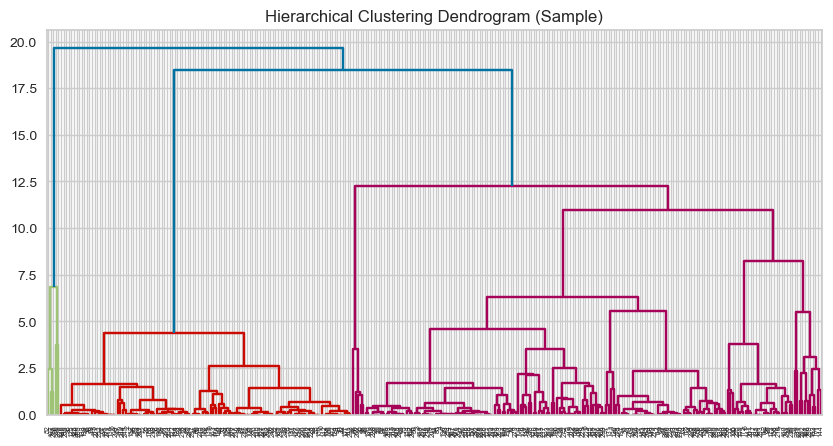

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

sample_idx = np.random.choice(len(X_scaled), size=300, replace=False)
Z = linkage(X_scaled[sample_idx], method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Sample)')
plt.show()


# Model 6 K-Prototypes

In [102]:
!pip install kmodes

Defaulting to user installation because normal site-packages is not writeable


In [103]:
import pandas as pd
from kmodes.kprototypes import KPrototypes

In [104]:
# Filter eligible customers
eligible_df_k = model_data[model_data['Eligibility_Flag'].str.upper() == 'ELIGIBLE'].copy()

In [105]:
eligible_df_k

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,TOTAL_CAPITAL_DUE,TOTAL_INTEREST_DUE,AVG_PAYMENT_RATIO,MONTHEND_CONVERTED_BALANCE,UTILIZATION,OOD,ACCT_STATUS,DEFAULT,PD,CREDIT_SCORE
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,1071845.16,135138.47,-0.007552,265556.892955,0.111111,0.0,ACTIVE,0,0.099240,835.0
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,0.00,0.00,0.000000,1253.765015,0.000000,0.0,ACTIVE,0,0.095382,838.0
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,0.00,0.00,0.000000,0.000000,0.000000,0.0,DORMANT,0,0.099100,836.0
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,-1354369.77,20821.79,0.000335,-173550.662476,-0.166667,0.0,ACTIVE,0,0.105644,831.0
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,0.00,0.00,0.000000,1386.209961,0.000000,0.0,CLOSE,0,0.104565,832.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,0.00,0.00,0.000000,1288.880005,0.000000,0.0,ACTIVE,0,0.101679,834.0
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,0.00,0.00,0.000000,43944.810313,0.000000,0.0,ACTIVE,0,0.106414,831.0
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,0.00,0.00,0.000000,433638.140625,0.000000,0.0,ACTIVE,0,0.083639,846.0
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,0.00,0.00,0.000000,54540.488281,0.000000,0.0,ACTIVE,0,0.098738,836.0


In [106]:
# Define features
numeric_features = ['Monthly_Avg_Balance', 'Avg_Monthly_Credit','AGE','CREDIT_SCORE']
categorical_features = ['OCCUPATION','CUSTOMER_RISK_NAME','GENDER', 'EMPLOYMENT_STATUS', 'MARITAL_STATUS','TARGET_DESC']

In [107]:
# Fill missing values
eligible_df_k[numeric_features] = eligible_df_k[numeric_features].fillna(0)
for col in categorical_features:
    eligible_df_k[col] = eligible_df_k[col].astype(str).fillna('Unknown')

In [108]:
cluster_data = eligible_df_k[numeric_features + categorical_features].copy()
cat_idx = [cluster_data.columns.get_loc(col) for col in categorical_features]

In [109]:
cluster_data

,Monthly_Avg_Balance,Avg_Monthly_Credit,AGE,CREDIT_SCORE,OCCUPATION,CUSTOMER_RISK_NAME,GENDER,EMPLOYMENT_STATUS,MARITAL_STATUS,TARGET_DESC
0,294090.520248,594627.180067,36,835.0,Entrepreneur / Business Owners,LOW,FEMALE,UNEMPLOYED,MARRIED,Signature
1,1288.532501,1288.532501,27,838.0,Garment & Related Trade Workers,LOW,FEMALE,EMPLOYED,SINGLE,Premier
2,0.000000,0.000000,41,836.0,Private Sector Non-Executives,LOW,FEMALE,EMPLOYED,Unknown,Essential
3,-328632.803597,406128.730574,25,831.0,Finance Professionals,LOW,FEMALE,EMPLOYED,Unknown,Essential
4,2755.104980,2755.104980,61,832.0,Entrepreneur / Business Owners,LOW,FEMALE,UNEMPLOYED,MARRIED,Signature
...,...,...,...,...,...,...,...,...,...,...
2497,5273.733337,84100.000000,39,834.0,Private Sector Executives,LOW,FEMALE,EMPLOYED,SINGLE,Essential
2498,26121.969971,418690.281250,34,831.0,Entrepreneur / Business Owners,MEDIUM,MALE,BUSINESS,SINGLE,Essential
2499,243207.672119,626505.000000,45,846.0,Entrepreneur / Business Owners,LOW,MALE,SELF-EMPLOYED,MARRIED,Essential
2500,64698.908854,32400.000000,29,836.0,Entrepreneur / Business Owners,LOW,FEMALE,SELF-EMPLOYED,MARRIED,Essential


In [110]:
# import matplotlib.pyplot as plt

# cost = []
# K = range(2, 10) 
#  # test 2 to 9 clusters

# for k in K:
#     kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
#     kproto.fit_predict(cluster_data, categorical=cat_idx)
#     cost.append(kproto.cost_)




In [ ]:
# from kmodes.kprototypes import KPrototypes
# from sklearn.metrics import silhouette_score, calinski_harabasz_score
# import matplotlib.pyplot as plt

# # Prepare numeric + encoded categorical data
# cluster_numeric = cluster_data.copy()
# for col in categorical_features:
#     cluster_numeric[col] = cluster_numeric[col].astype('category').cat.codes

# # Define range of clusters to test
# K = range(2, 10)

# # Initialize lists to store metrics
# cost = []
# sil_scores = []
# ch_scores = []

# # Loop once per k and compute all metrics
# for k in K:
#     kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
#     labels = kproto.fit_predict(cluster_data.values, categorical=cat_idx)
    
#     cost.append(kproto.cost_)
#     sil_scores.append(silhouette_score(cluster_numeric, labels, metric='euclidean'))
#     ch_scores.append(calinski_harabasz_score(cluster_numeric, labels))

KeyboardInterrupt: 

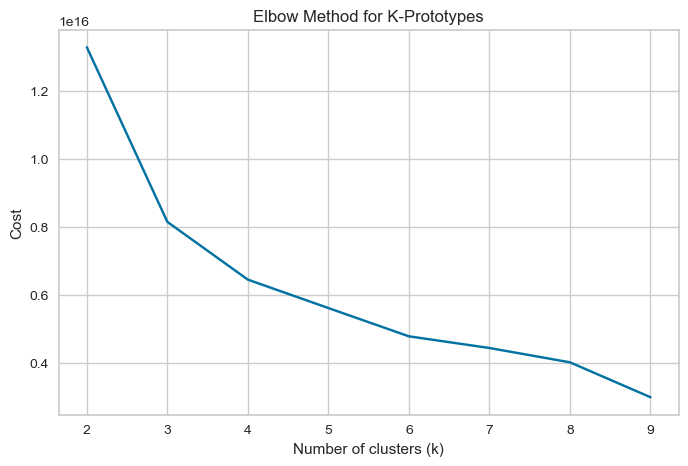

In [ ]:
# Plot Elbow (Cost)
plt.figure(figsize=(8,5))
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for K-Prototypes')
plt.show()

In [ ]:
!pip install kneed


from kneed import KneeLocator
import matplotlib.pyplot as plt

knee = KneeLocator(K, cost, curve='convex', direction='decreasing')
optimal_k = knee.knee

print("Optimal number of clusters (Elbow Method):", optimal_k)

Defaulting to user installation because normal site-packages is not writeable
Optimal number of clusters (Elbow Method): 4


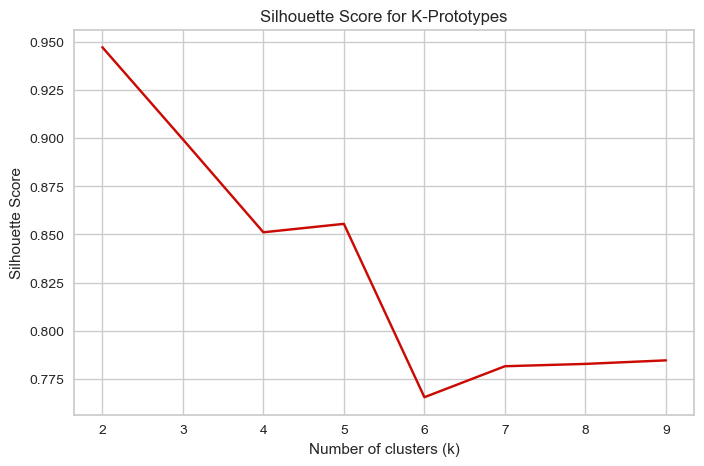

In [ ]:
# Plot Silhouette Score
plt.figure(figsize=(8,5))
plt.plot(K, sil_scores, 'rx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Prototypes')
plt.show()

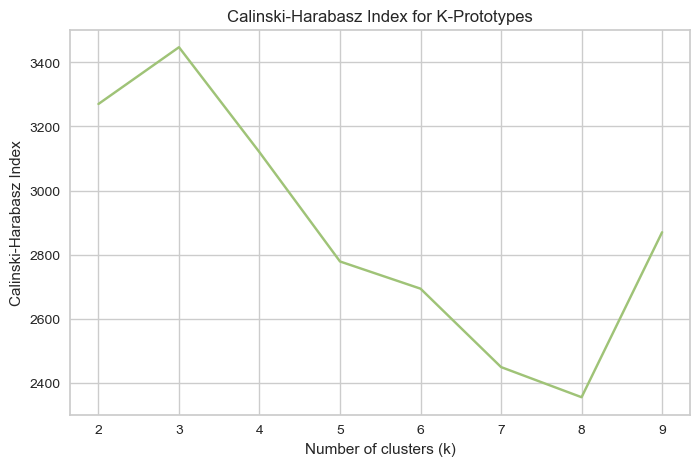

In [ ]:
# Plot Calinski-Harabasz Index
plt.figure(figsize=(8,5))
plt.plot(K, ch_scores, 'gx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for K-Prototypes')
plt.show()


In [ ]:
# Print all metrics per k
for i, k_val in enumerate(K):
    print(f"k={k_val} -> Cost: {cost[i]:.2f}, Silhouette: {sil_scores[i]:.4f}, CH: {ch_scores[i]:.2f}")

In [ ]:
# Copy cluster_data so we don't modify the original
cluster_numeric = cluster_data.copy()

for col in categorical_features:
    cluster_numeric[col] = cluster_numeric[col].astype('category').cat.codes


# Model 7 - Gower

In [ ]:
!pip install gower


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
import numpy as np

# Select features
numeric_features = [
    'AGE',
    'Monthly_Avg_Balance',
    'Avg_Monthly_Credit','CREDIT_SCORE'
]


categorical_features = [
    'GENDER',
    'EMPLOYMENT_STATUS',
    'MARITAL_STATUS',
    'Employment_Segment','TARGET_DESC','CUSTOMER_RISK_NAME'
]

gower_df = model_data[
    model_data['Eligibility_Flag'].str.upper() == 'ELIGIBLE'
][numeric_features + categorical_features].copy()


# Handle missing values
gower_df[numeric_features] = gower_df[numeric_features].fillna(gower_df[numeric_features].median())
gower_df[categorical_features] = gower_df[categorical_features].fillna('Unknown')


In [ ]:
import gower

gower_dist = gower.gower_matrix(gower_df)


In [ ]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 4  

hc = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric='precomputed',
    linkage='average'
)

gower_df['Cluster'] = hc.fit_predict(gower_dist)


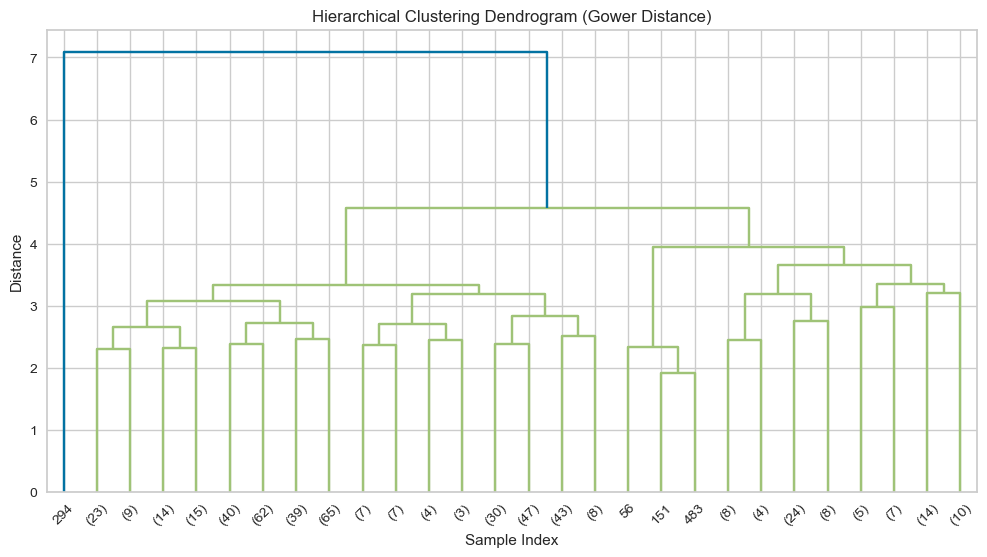

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

sample = gower_df.sample(n=500, random_state=42)
gower_sample = gower.gower_matrix(sample)

Z = linkage(gower_sample, method='average')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Gower Distance)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [ ]:
gower_df.groupby('Cluster')[numeric_features].mean()


,AGE,Monthly_Avg_Balance,Avg_Monthly_Credit,CREDIT_SCORE
Cluster,,,,
0,36.688346,1.162496e+05,6.671548e+05,821.779136
1,67.311558,7.270735e+05,5.834691e+05,833.326633
2,33.000000,1.354960e+07,3.779673e+07,846.500000
3,51.000000,-7.173427e+05,0.000000e+00,250.000000


In [ ]:
for col in categorical_features:
    print(f"\n{col}")
    print(pd.crosstab(gower_df['Cluster'], gower_df[col], normalize='index'))



GENDER
GENDER     FEMALE      MALE
Cluster                    
0        0.381056  0.618944
1        0.417085  0.582915
2        1.000000  0.000000
3        0.000000  1.000000

EMPLOYMENT_STATUS
EMPLOYMENT_STATUS  BUSINESS  EMPLOYED  FREELANCE   RETIRED  SELF-EMPLOYED  \
Cluster                                                                     
0                  0.097337  0.449149   0.003055  0.004365       0.364906   
1                  0.100503  0.236181   0.000000  0.140704       0.371859   
2                  0.500000  0.500000   0.000000  0.000000       0.000000   
3                  0.000000  0.000000   0.000000  0.000000       0.000000   

EMPLOYMENT_STATUS   STUDENT  UNEMPLOYED   Unknown  
Cluster                                            
0                  0.030554    0.046704  0.003928  
1                  0.000000    0.145729  0.005025  
2                  0.000000    0.000000  0.000000  
3                  0.000000    0.000000  1.000000  

MARITAL_STATUS
MARITAL_STATUS

# comparing each model

In [ ]:
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical features
encoded_df = pd.get_dummies(cluster_data, drop_first=True)

# Scale numeric features
scaler = StandardScaler()
encoded_df[numeric_features] = scaler.fit_transform(encoded_df[numeric_features])

# Convert to numpy array for metrics
X_encoded = encoded_df.values

print("X_encoded rows:", len(X_encoded))


X_encoded rows: 2493


In [ ]:
k = 4

# K-Prototypes
kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
kproto_labels = kproto.fit_predict(cluster_data.values, categorical=cat_idx)
sil_kproto = silhouette_score(X_encoded, kproto_labels, metric='euclidean')

# Gower
hc = AgglomerativeClustering(n_clusters=k, metric='precomputed', linkage='average')
gower_labels = hc.fit_predict(gower_dist)
sil_gower = silhouette_score(gower_dist, gower_labels, metric='precomputed')

print("Silhouette K-Prototypes:", sil_kproto)
print("Silhouette Gower:", sil_gower)


Silhouette K-Prototypes: 0.277662841052316
Silhouette Gower: 0.2111858


In [ ]:
# CH Scores
from sklearn.metrics import calinski_harabasz_score
ch_kproto = calinski_harabasz_score(X_encoded, kproto_labels)
ch_gower = calinski_harabasz_score(X_encoded, gower_labels)

print("Calinski-Harabasz K-Prototypes:", ch_kproto)
print("Calinski-Harabasz Gower:", ch_gower)


Calinski-Harabasz K-Prototypes: 170.90767826596124
Calinski-Harabasz Gower: 90.15723181784948


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Davies–Bouldin for K-Prototypes
db_kproto = davies_bouldin_score(X_encoded, kproto_labels)
print("Davies–Bouldin Index (K-Prototypes):", db_kproto)

# Davies–Bouldin for Gower clusters
db_gower = davies_bouldin_score(X_encoded, gower_labels)
print("Davies–Bouldin Index (Gower + Agglomerative):", db_gower)


Davies–Bouldin Index (K-Prototypes): 1.9909060815871782
Davies–Bouldin Index (Gower + Agglomerative): 1.2221699912550688


In [ ]:
from sklearn.metrics import adjusted_rand_score

# Assuming you already have:
# kproto_labels -> cluster labels from K-Prototypes
# gower_labels  -> cluster labels from Gower + Agglomerative

# Compute ARI
ari_score = adjusted_rand_score(kproto_labels, gower_labels)

print("Adjusted Rand Index (K-Prototypes vs Gower):", ari_score)


Adjusted Rand Index (K-Prototypes vs Gower): 0.0480126740325618


# Chosing K prototype

In [114]:
from kmodes.kprototypes import KPrototypes
import pandas as pd

# Use a separate copy for final clustering
eligible_final = model_data[model_data['Eligibility_Flag'].str.upper() == 'ELIGIBLE'].copy()

In [115]:
eligible_final

,MASKED_ID,NAME_MASKED_ID,AGE,GENDER,CUSTOMER_RISK,CUSTOMER_RISK_NAME,OCCUPATION,DISTRICT,TARGET_CODE,TARGET_DESC,...,TOTAL_CAPITAL_DUE,TOTAL_INTEREST_DUE,AVG_PAYMENT_RATIO,MONTHEND_CONVERTED_BALANCE,UTILIZATION,OOD,ACCT_STATUS,DEFAULT,PD,CREDIT_SCORE
0,000454,CUSTOMER_356,36,FEMALE,1.0,LOW,Entrepreneur / Business Owners,ANURADHAPURA,948,Signature,...,1071845.16,135138.47,-0.007552,265556.892955,0.111111,0.0,ACTIVE,0,0.099240,835.0
1,000866,CUSTOMER_410,27,FEMALE,1.0,LOW,Garment & Related Trade Workers,ANURADHAPURA,908,Premier,...,0.00,0.00,0.000000,1253.765015,0.000000,0.0,ACTIVE,0,0.095382,838.0
2,001135,CUSTOMER_455,41,FEMALE,1.0,LOW,Private Sector Non-Executives,HAMBANTOTA,988,Essential,...,0.00,0.00,0.000000,0.000000,0.000000,0.0,DORMANT,0,0.099100,836.0
3,001538,CUSTOMER_899,25,FEMALE,1.0,LOW,Finance Professionals,GALLE,988,Essential,...,-1354369.77,20821.79,0.000335,-173550.662476,-0.166667,0.0,ACTIVE,0,0.105644,831.0
4,001906,CUSTOMER_2307,61,FEMALE,1.0,LOW,Entrepreneur / Business Owners,COLOMBO,948,Signature,...,0.00,0.00,0.000000,1386.209961,0.000000,0.0,CLOSE,0,0.104565,832.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,9998375,CUSTOMER_969,39,FEMALE,1.0,LOW,Private Sector Executives,BADULLA,988,Essential,...,0.00,0.00,0.000000,1288.880005,0.000000,0.0,ACTIVE,0,0.101679,834.0
2498,9998721,CUSTOMER_833,34,MALE,2.0,MEDIUM,Entrepreneur / Business Owners,COLOMBO,988,Essential,...,0.00,0.00,0.000000,43944.810313,0.000000,0.0,ACTIVE,0,0.106414,831.0
2499,9999535,CUSTOMER_1426,45,MALE,1.0,LOW,Entrepreneur / Business Owners,MATALE,988,Essential,...,0.00,0.00,0.000000,433638.140625,0.000000,0.0,ACTIVE,0,0.083639,846.0
2500,9999658,CUSTOMER_2065,29,FEMALE,1.0,LOW,Entrepreneur / Business Owners,GAMPAHA,988,Essential,...,0.00,0.00,0.000000,54540.488281,0.000000,0.0,ACTIVE,0,0.098738,836.0


In [116]:
# Define features
numeric_feats_final = ['Monthly_Avg_Balance', 'Avg_Monthly_Credit','AGE','CREDIT_SCORE']
categorical_feats_final = ['OCCUPATION','CUSTOMER_RISK_NAME','GENDER', 
                           'EMPLOYMENT_STATUS', 'MARITAL_STATUS','TARGET_DESC']

In [117]:
# Fill missing values
eligible_final[numeric_feats_final] = eligible_final[numeric_feats_final].fillna(0)
for col in categorical_feats_final:
    eligible_final[col] = eligible_final[col].astype(str).fillna('Unknown')

In [118]:
# Prepare cluster data
cluster_data_final = eligible_final[numeric_feats_final + categorical_feats_final].copy()
cat_idx_final = [cluster_data_final.columns.get_loc(col) for col in categorical_feats_final]

In [119]:
# Fit K-Prototypes with k = 4
kproto_final = KPrototypes(n_clusters=4, init='Cao', random_state=42)
cluster_labels_final = kproto_final.fit_predict(cluster_data_final.values, categorical=cat_idx_final)

In [120]:
# Assign cluster labels to dataframe
eligible_final['Cluster_KProto'] = cluster_labels_final

In [ ]:
# # Encode categorical columns as numeric (optional, for metrics)
# cluster_numeric_final = cluster_data_final.copy()
# for col in categorical_feats_final:
#     cluster_numeric_final[col] = cluster_numeric_final[col].astype('category').cat.codes


In [121]:
# Show cluster sizes
cluster_sizes_final = eligible_final['Cluster_KProto'].value_counts().sort_index()
print("Cluster sizes (k=4):")
print(cluster_sizes_final)

Cluster sizes (k=4):
0      25
1    2334
2      10
3     124
Name: Cluster_KProto, dtype: int64


In [122]:
cluster_summary_list = []

for cluster in eligible_final['Cluster_KProto'].unique():
    cluster_data = eligible_final[eligible_final['Cluster_KProto'] == cluster]
    
    summary = {}
    summary['Cluster'] = cluster
    
    # Numeric features: mean
    for col in numeric_feats_final:
        summary[col] = round(cluster_data[col].mean(), 2)
    
    # Categorical features: top category + percentage
    for col in categorical_feats_final:
        top_cat = cluster_data[col].value_counts(normalize=True).idxmax()
        top_pct = round(cluster_data[col].value_counts(normalize=True).max() * 100, 1)
        summary[col] = f"{top_cat} ({top_pct}%)"
    
    cluster_summary_list.append(summary)

# Convert to DataFrame
cluster_summary_df = pd.DataFrame(cluster_summary_list)




In [123]:
# Show table
cluster_summary_df

,Cluster,Monthly_Avg_Balance,Avg_Monthly_Credit,AGE,CREDIT_SCORE,OCCUPATION,CUSTOMER_RISK_NAME,GENDER,EMPLOYMENT_STATUS,MARITAL_STATUS,TARGET_DESC
0,1,30236.65,178603.08,38.73,821.29,Entrepreneur / Business Owners (51.1%),LOW (81.9%),MALE (60.3%),EMPLOYED (43.3%),MARRIED (41.2%),Essential (69.4%)
1,3,1971071.67,4161881.85,45.44,833.36,Entrepreneur / Business Owners (46.0%),LOW (65.3%),MALE (78.2%),EMPLOYED (43.5%),MARRIED (58.9%),Essential (50.8%)
2,0,2796516.38,15210935.46,45.52,854.48,Entrepreneur / Business Owners (64.0%),LOW (60.0%),MALE (88.0%),BUSINESS (44.0%),MARRIED (56.0%),Summit (52.0%)
3,2,5249926.03,40694904.76,38.60,888.60,Entrepreneur / Business Owners (40.0%),MEDIUM (60.0%),MALE (80.0%),EMPLOYED (50.0%),SINGLE (40.0%),Summit (50.0%)


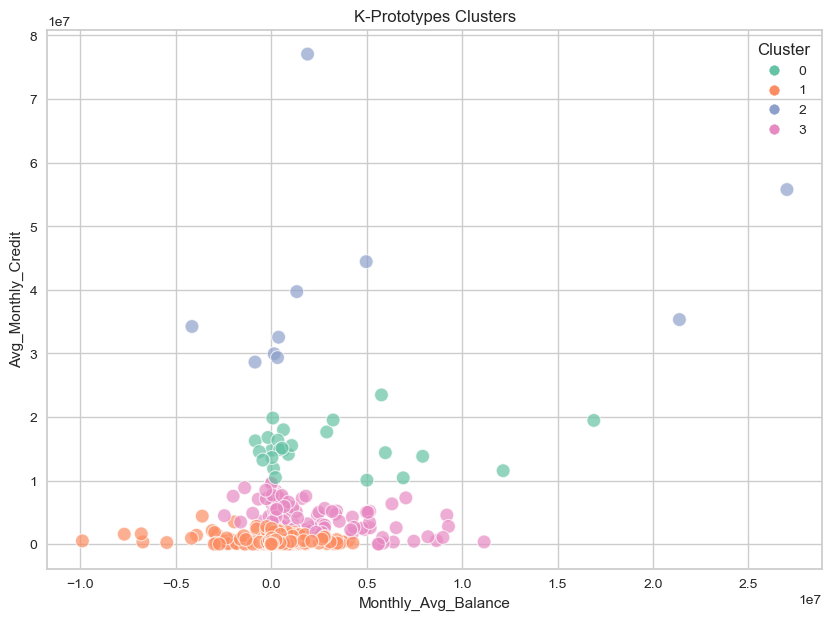

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose two numeric features for the scatter plot
x_feature = 'Monthly_Avg_Balance'
y_feature = 'Avg_Monthly_Credit'

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=eligible_final,
    x=x_feature,
    y=y_feature,
    hue='Cluster_KProto',        # color by cluster
    palette='Set2',              # different colors
    s=100,                       # marker size
    alpha=0.7                     # transparency
)

plt.title('K-Prototypes Clusters')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
